# Relatório Exercício Programa (EP) 2
## MAC 219: Programação Paralela e Concorrente

### Participantes:

| Nome | Nusp|
|----|:---:|
| Débora D'Angelo Reina de Araujo | 11221668 |
| Eike Souza da Silva | 4618653 |
| Julia Leite | 11221797 |
| Lara Ayumi Nagamatsu | 9910568 |

In [185]:
# Libs:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st


In [186]:
from google.colab import files
uploaded = files.upload()

## Funções Auxiliares

In [187]:
def mean(arr):
  if (isinstance(arr[0], list) and not isinstance(arr[0][0], list)):
    s = 0
    cnt = 0
    for i in range(len(arr)):
      s = s + sum(arr[i])
      cnt = cnt + len(arr[i])
    return (s / cnt)
  elif (isinstance(arr, list)):
    return sum(arr)/len(arr)
  else:
    print("ERRO. Tipo nao previsto")

## Obtemos os dados dos arquivos.csv

In [188]:
# Exemplo com o OMPI + OMP

# leio o arquivo
aux = pd.read_csv('MPI_OMP-Triple_Spiral_Valley-4096.csv')

# processos e threads testados
processos = [2, 4, 8, 16]
threads = [1, 2, 4, 8, 16, 32]

# crio um dicionario para os programas
# data[<tipo do programa>][<numero de processos>][<numero de threads>] = <lista 
#     dos 15 tempos de execução analisados>

data = {}

data['mpi_omp'] = {}

for p in processos:
  data['mpi_omp'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p) & (aux.n_threads == t)]
    tmp = tmp['time']
    data['mpi_omp'][p][t] = list(tmp.values)
  

In [189]:
# capturar outros dados

# MPI

# leio o arquivo
aux = pd.read_csv('MPI-Triple_Spiral_Valley-4096.csv')

data['mpi'] = {}

for p in processos:
  data['mpi'][p] = {}
  tmp = aux[aux.n_process == p]
  tmp = tmp['time']
  data['mpi'][p] = list(tmp.values)

#print(data['mpi'][16])

In [190]:
# Pthreads + MPI
# leio o arquivo
aux = pd.read_csv('MPI_PTH-Triple_Spiral_Valley-4096.csv')

data['mpi_pth'] = {}

for p in processos:
  data['mpi_pth'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p) & (aux.n_threads == t)]
    tmp = tmp['time']
    data['mpi_pth'][p][t] = list(tmp.values)

#print(data['mpi_pth'][16][32])

**OBS**: Como as versões OpenMP, Pthreads e Sequencial não possuem mais processos do que um, elas só possuem uma chave (o número de threads)

In [191]:
# OpenMP

# leio o arquivo
aux = pd.read_csv('OpenMP-Triple_Spiral_Valley-4096.csv')

data['omp'] = {}

for t in threads:
  tmp = aux[(aux.n_threads == t)]
  tmp = tmp['time']
  data['omp'][t] = list(tmp.values)

#print(data['omp'][32])

In [192]:
# Pthreads

# leio o arquivo
aux = pd.read_csv('Pthreads-Triple_Spiral_Valley-4096.csv')

data['pth'] = {}

for t in threads:
  tmp = aux[(aux.n_threads == t)]
  tmp = tmp['time']
  data['pth'][t] = list(tmp.values)

#print(data['pth'][32])

In [193]:
# Sequential

# leio o arquivo
aux = pd.read_csv('Sequential-Triple_Spiral_Valley-4096.csv')

tmp = aux['time']

data['seq'] = {}
data['seq'][1] = list(tmp.values)

#print(data['seq'][1])

# Determinação dos melhores parâmetros:

Para determinamos o parâmetros que resultavam em maior ganho de performance para cada implementação, fixamos:

### Parâmetros utilizados:

- **Repetições**: 15
- **Tamanho da imagem**: 4096
- **Região**: Triple Spiral Valley

### Implementações:
  - Sequencial
  - Pthreads
  - OMP
  - OMPI
  - OMPI + Pthreads
  - OMPI + OMP

### Número de processos e threads:
  - Processos: 2, 4, 8, 16
  - Threads:   1, 2, 4, 8, 16, 32


### Observações:

A **linha em vermelho**, chamada de **controle**, representa a **média** da execução em **tempo sequencial**, para termos uma idea da mudança no tempo de execução para cada situação.

Também temos uma **linha em verde**, representando o **tempo médio de todas as execuções** para cada situação.

O sombreado nas retas é o intervalo de confiança.

## Sequencial

Arquivo de referência: ```mandelbrot_seq```

Tempo médio de execução: 26.868s

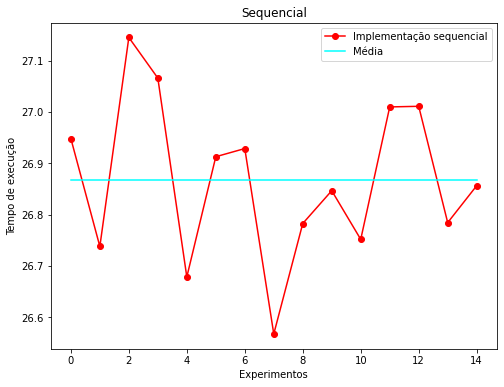

In [194]:
seq_mean = round(mean(data['seq'][1]), 3)

eixo_x = [x for x in range(15)]

plt.figure(figsize = (8,6))

plt.plot(eixo_x, data['seq'][1], color='r', marker='o', label='Implementação sequencial')
plt.plot(eixo_x, [seq_mean for x in range(15)], color='aqua', label='Média')

plt.xlabel("Experimentos")
plt.ylabel("Tempo de execução")
plt.legend()
plt.title("Sequencial")
plt.show()

# print(seq_mean)
# print('Intervalo:', [ round(min(data['seq'][1]), 3), round(max(data['seq'][1]), 3) ])

## Pthreads

Arquivo de referência: ```mandelbrot_pth.c```

- Tempo médio de execução: 11.26s
- Número ótimo de threads: 36

In [195]:
pth_mean = []
for t in threads:
  pth_mean.append(round(mean(data['pth'][t]), 3))

for i in range(len(threads)):
  print('Para', threads[i], 'thread(s):', pth_mean[i])
  print('Intervalo:', [ round(min(data['pth'][threads[i]]), 3), round(max(data['pth'][threads[i]]), 3) ])
  print()

print (mean(pth_mean))

Para 1 thread(s): 27.015
Intervalo: [26.782, 27.221]

Para 2 thread(s): 15.917
Intervalo: [15.395, 16.509]

Para 4 thread(s): 9.634
Intervalo: [9.284, 10.03]

Para 8 thread(s): 6.338
Intervalo: [5.636, 6.893]

Para 16 thread(s): 4.692
Intervalo: [4.254, 5.051]

Para 32 thread(s): 4.023
Intervalo: [3.709, 4.452]

11.269833333333333


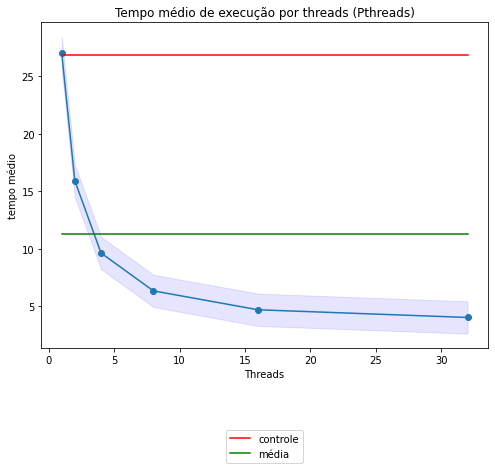

In [196]:
plt.close()

plt.figure(figsize = (8,6))

plt.plot(threads, pth_mean, label = '', marker='o')
plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red')
plt.plot(threads, [round(mean(pth_mean), 3)] * len(threads), label = 'média', color='green')

# Intervalo de confiança
ci = 1.96 * np.std(pth_mean)/np.mean(pth_mean)
plt.fill_between(threads, (pth_mean-ci), (pth_mean+ci), color='b', alpha=.1)


plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (Pthreads)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()


## OpenMP

Arquivo de referência: ```mandelbrot_omp.c```

- Tempo médio de execução: 11.09s
- Número ótimo de threads: 32

In [197]:
omp_mean = []
for t in threads:
  omp_mean.append(round(mean(data['omp'][t]), 3))

for i in range(len(threads)):
  print('Para', threads[i], 'thread(s):', omp_mean[i])
  print('Intervalo:', [ round(min(data['omp'][threads[i]]), 3), round(max(data['omp'][threads[i]]), 3) ])
  print()

print (mean(omp_mean))

Para 1 thread(s): 26.838
Intervalo: [26.603, 27.295]

Para 2 thread(s): 15.87
Intervalo: [15.272, 16.42]

Para 4 thread(s): 9.499
Intervalo: [9.197, 9.796]

Para 8 thread(s): 6.235
Intervalo: [5.751, 6.833]

Para 16 thread(s): 4.715
Intervalo: [4.326, 5.25]

Para 32 thread(s): 4.036
Intervalo: [3.412, 4.767]

11.198833333333333


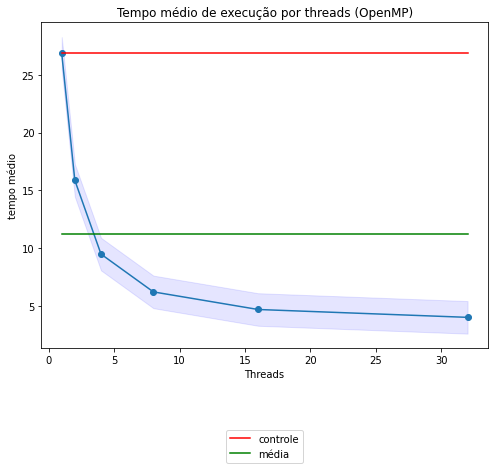

In [198]:
plt.close()

plt.figure(figsize = (8,6))

plt.plot(threads, omp_mean, label = '', marker='o')
plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red')
plt.plot(threads, [round(mean(omp_mean), 3)] * len(threads), label = 'média', color='green')

# Intervalo de confiança
ci = 1.96 * np.std(omp_mean)/np.mean(omp_mean)
plt.fill_between(threads, (omp_mean-ci), (omp_mean+ci), color='b', alpha=.1)

plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (OpenMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()

## OpenMPI

Arquivo de referência: ```mandelbrot_mpi.c```

- Tempo médio de execução: 12.15s
- Número ótimo de processos: 16
- Número ótimo de threads: 32

In [199]:
mpi_mean = []

for p in processos:
  mpi_mean.append(round(mean(data['mpi'][p]), 3))


for p in range(len(processos)):
  print('Para' , processos[p], 'processo(s):', mpi_mean[p])
  print('Intervalo:', [round(min(data['mpi'][processos[p]]), 3), round(max(data['mpi'][processos[p]]), 3) ])
  print()

print(mpi_mean)

Para 2 processo(s): 28.296
Intervalo: [22.73, 35.52]

Para 4 processo(s): 11.091
Intervalo: [10.672, 11.847]

Para 8 processo(s): 7.615
Intervalo: [7.332, 8.377]

Para 16 processo(s): 6.167
Intervalo: [5.759, 6.882]

[28.296, 11.091, 7.615, 6.167]


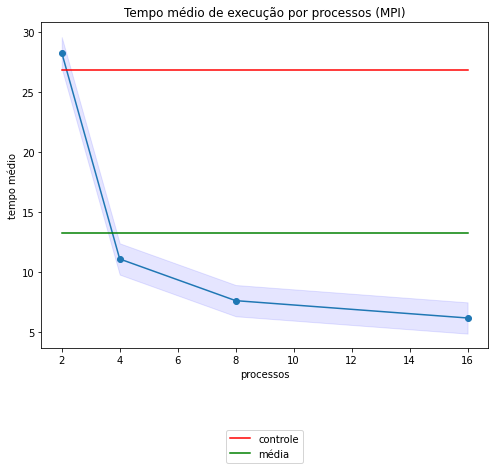

In [200]:

plt.close()
plt.figure(figsize = (8,6))
plt.plot(processos, mpi_mean, label = '', marker='o')
plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red')
plt.plot(processos, [round(mean(mpi_mean), 3)] * len(processos), label = 'média', color='green')

# Intervalo de confiança
ci = 1.96 * np.std(mpi_mean)/np.mean(mpi_mean)
plt.fill_between(processos, (mpi_mean-ci), (mpi_mean+ci), color='b', alpha=.1)

plt.ylabel("tempo médio")
plt.xlabel("processos")
plt.title("Tempo médio de execução por processos (MPI)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()


## OpenMPI + OpenMP

Arquivo de referência: ```mandelbrot_mpi_omp.c```

- Tempo médio de execução: 9.75s
- Número ótimo de processos: 16
- Número ótimo de threads: 32

In [201]:
mpi_omp_mean = []

for p in processos:
  tmp = []
  for t in threads:
    tmp.append(round(mean(data['mpi_omp'][p][t]), 3))
  mpi_omp_mean.append(tmp)

for p in range(len(processos)):
  for t in range(len(threads)):
    print('Para', threads[t], 'thread(s) e', processos[p], 'processo(s):', mpi_omp_mean[p][t])
    print('Intervalo:', [ round(min(data['mpi_omp'][processos[p]][threads[t]]), 3), round(max(data['mpi_omp'][processos[p]][threads[t]]), 3) ])
    print()
  print('\n')

print(mean(mpi_omp_mean))

Para 1 thread(s) e 2 processo(s): 26.931
Intervalo: [26.374, 28.304]

Para 2 thread(s) e 2 processo(s): 18.439
Intervalo: [17.933, 19.619]

Para 4 thread(s) e 2 processo(s): 19.834
Intervalo: [17.543, 22.649]

Para 8 thread(s) e 2 processo(s): 20.453
Intervalo: [20.141, 20.808]

Para 16 thread(s) e 2 processo(s): 19.706
Intervalo: [19.215, 20.082]

Para 32 thread(s) e 2 processo(s): 19.396
Intervalo: [19.127, 19.66]



Para 1 thread(s) e 4 processo(s): 11.935
Intervalo: [11.752, 12.318]

Para 2 thread(s) e 4 processo(s): 8.038
Intervalo: [7.75, 8.365]

Para 4 thread(s) e 4 processo(s): 6.289
Intervalo: [5.823, 6.891]

Para 8 thread(s) e 4 processo(s): 5.543
Intervalo: [5.21, 6.592]

Para 16 thread(s) e 4 processo(s): 5.451
Intervalo: [5.153, 6.129]

Para 32 thread(s) e 4 processo(s): 5.417
Intervalo: [5.108, 5.868]



Para 1 thread(s) e 8 processo(s): 7.434
Intervalo: [7.228, 7.822]

Para 2 thread(s) e 8 processo(s): 5.938
Intervalo: [5.575, 6.438]

Para 4 thread(s) e 8 processo(s): 5.

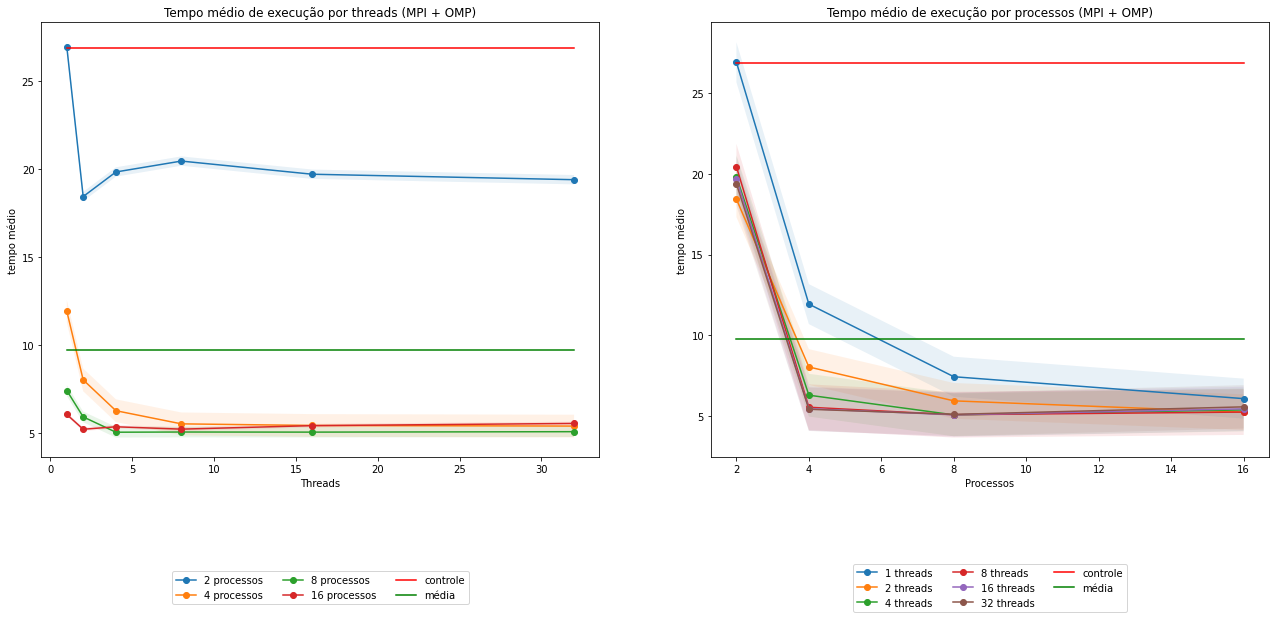

In [202]:
plt.close()

plt.figure(figsize = (22,8))

plt.subplot(1,2,1)

for i in range(len(processos)):
  plt.plot(threads, mpi_omp_mean[i], label = f'{processos[i]} processos', marker='o')
  y=mpi_omp_mean[i]
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(threads, (y-ci), (y+ci), alpha=.1)

plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red')
plt.plot(threads, [round(mean(mpi_omp_mean), 3)] * len(threads), label = 'média', color='green')
plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (MPI + OMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.subplot(1,2,2)

for i in range(len(threads)):
  y=[mpi_omp_mean[j][i] for j in range(len(processos))] 
  plt.plot(processos, y, label = f'{threads[i]} threads', marker='o')
  
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(processos, (y-ci), (y+ci), alpha=.1)

plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red')
plt.plot(processos, [round(mean(mpi_omp_mean), 3)] * len(processos), label = 'média', color='green')
plt.ylabel("tempo médio")
plt.xlabel("Processos")
plt.title("Tempo médio de execução por processos (MPI + OMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.show()

## OpenMPI + Pthreads

Arquivo de referência: ```mandelbrot_mpi_pth.c```

- Tempo médio de execução: 7.17s
- Número ótimo de processos: 16
- Número ótimo de threads: 

In [203]:
mpi_pth_mean = []

for p in processos:
  tmp = []
  for t in threads:
    tmp.append(round(mean(data['mpi_pth'][p][t]), 3))
  mpi_pth_mean.append(tmp)

for p in range(len(processos)):
  for t in range(len(threads)):
    print('Para', threads[t], 'thread(s) e', processos[p], 'processo(s):', mpi_pth_mean[p][t])
    print('Intervalo:', [ round(min(data['mpi_pth'][processos[p]][threads[t]]), 3), round(max(data['mpi_pth'][processos[p]][threads[t]]), 3) ])
    print()
  print('\n')

print(mean(mpi_pth_mean))

Para 1 thread(s) e 2 processo(s): 20.517
Intervalo: [16.366, 31.017]

Para 2 thread(s) e 2 processo(s): 11.815
Intervalo: [11.341, 12.84]

Para 4 thread(s) e 2 processo(s): 12.023
Intervalo: [11.315, 13.016]

Para 8 thread(s) e 2 processo(s): 11.737
Intervalo: [11.098, 12.893]

Para 16 thread(s) e 2 processo(s): 11.755
Intervalo: [11.254, 12.368]

Para 32 thread(s) e 2 processo(s): 12.094
Intervalo: [11.563, 13.174]



Para 1 thread(s) e 4 processo(s): 10.841
Intervalo: [9.975, 11.95]

Para 2 thread(s) e 4 processo(s): 7.144
Intervalo: [6.241, 8.306]

Para 4 thread(s) e 4 processo(s): 4.766
Intervalo: [4.512, 5.078]

Para 8 thread(s) e 4 processo(s): 4.213
Intervalo: [4.006, 4.786]

Para 16 thread(s) e 4 processo(s): 4.106
Intervalo: [3.922, 4.305]

Para 32 thread(s) e 4 processo(s): 4.191
Intervalo: [3.986, 4.707]



Para 1 thread(s) e 8 processo(s): 6.325
Intervalo: [6.064, 7.051]

Para 2 thread(s) e 8 processo(s): 4.879
Intervalo: [4.525, 5.833]

Para 4 thread(s) e 8 processo(s): 4.

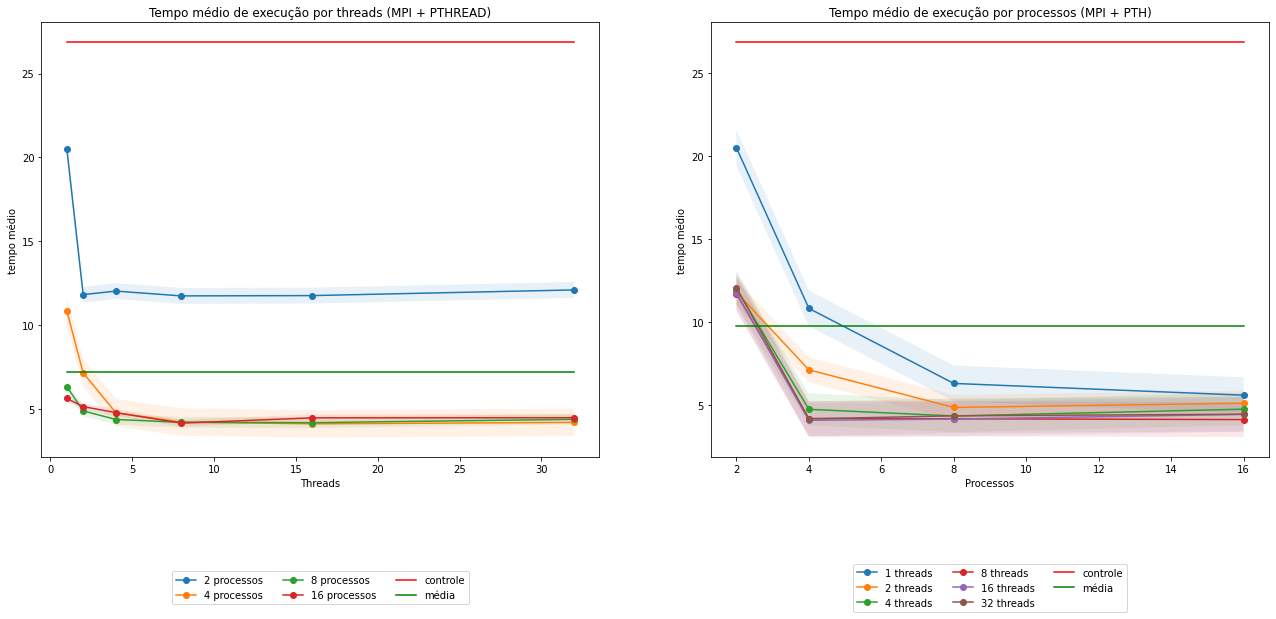

In [204]:
plt.close()


plt.figure(figsize = (22,8))

plt.subplot(1,2,1)

for i in range(len(processos)):
  plt.plot(threads, mpi_pth_mean[i], label = f'{processos[i]} processos', marker='o')
  y=mpi_pth_mean[i]
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(threads, (y-ci), (y+ci), alpha=.1)

plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red')
plt.plot(threads, [round(mean(mpi_pth_mean), 3)] * len(threads), label = 'média', color='green')
plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (MPI + PTHREAD)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.subplot(1,2,2)

for i in range(len(threads)):
  y=[mpi_pth_mean[j][i] for j in range(len(processos))] 
  plt.plot(processos, y, label = f'{threads[i]} threads', marker='o')
  
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(processos, (y-ci), (y+ci), alpha=.1)

plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red')
plt.plot(processos, [round(mean(mpi_omp_mean), 3)] * len(processos), label = 'média', color='green')
plt.ylabel("tempo médio")
plt.xlabel("Processos")
plt.title("Tempo médio de execução por processos (MPI + PTH)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)



plt.show()

# Comparação entre as implementações

O critério de avaliação dentre as implementações do Algoritmo de Mandelbrot é o menor tempo de execução. Contudo, deve-se levar em conta a exigência de recursos computacionais para se chegar a esses resultados.

Abaixo, encontram-se as análises de desempenho tendo em vista processos, número de threads e a combinação desses dois parâmetros.

## Processos

In [213]:
melhor_processos = {
    'tempo': {
        'mpi': {},
        'mpi_omp': {},
        'mpi_pth': {}
    },
    'threads': {
        'mpi': {},
        'mpi_omp': {},
        'mpi_pth': {}
    }
}

aux = pd.read_csv('MPI-Triple_Spiral_Valley-4096.csv')

data_aux = {}

data_aux['mpi'] = {}

for p in processos:
  data_aux['mpi'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p)]
    tmp = tmp['time']
    data_aux['mpi'][p][t] = list(tmp.values)

#print(data_aux['mpi'])

for e in melhor_processos['tempo']:
  for p in processos:
    melhor_processos['tempo'][e][p] = 10000 #numero "infinito arbitrario"
    for t in threads:
      if(e == 'mpi'):
        tmp = min(data_aux['mpi'][p][t])
      else:
        tmp = min(data[e][p][t])
      if tmp < melhor_processos['tempo'][e][p]:
        melhor_processos['tempo'][e][p] = tmp 
        melhor_processos['threads'][e][p] = t

#print(melhor_processos)

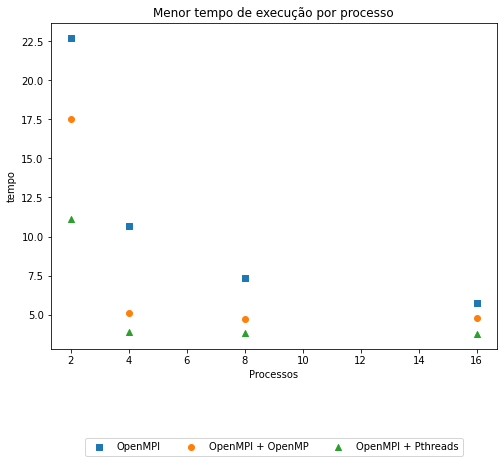

In [206]:
plt.close()

plt.figure(figsize=(8,6))

plt.scatter(melhor_processos['tempo']['mpi'].keys(), melhor_processos['tempo']['mpi'].values(), label='OpenMPI', marker='s')
plt.scatter(melhor_processos['tempo']['mpi_omp'].keys(), melhor_processos['tempo']['mpi_omp'].values(), label='OpenMPI + OpenMP', marker='o')
plt.scatter(melhor_processos['tempo']['mpi_pth'].keys(), melhor_processos['tempo']['mpi_pth'].values(), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("tempo")
plt.xlabel("Processos")
plt.title("Menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

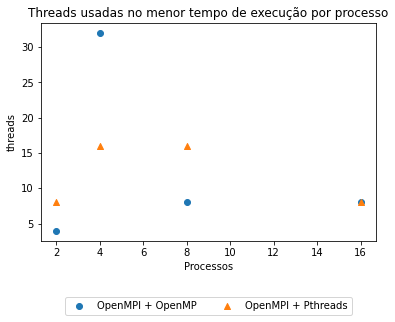

In [207]:
plt.close()

#plt.scatter(melhor_processos['threads']['mpi'].keys(), melhor_processos['threads']['mpi'].values(), label='OpenMPI', marker='s')
plt.scatter(melhor_processos_t['threads']['mpi_omp'].keys(), melhor_processos_t['threads']['mpi_omp'].values(), label='OpenMPI + OpenMP', marker='o')
plt.scatter(melhor_processos_t['threads']['mpi_pth'].keys(), melhor_processos_t['threads']['mpi_pth'].values(), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("threads")
plt.xlabel("Processos")
plt.title("Threads usadas no menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

#### Threads

In [208]:
melhor_threads = {
    'tempo': {
        'mpi_omp': {},
        'mpi_pth': {}
    },
    'processos': {
        'mpi_omp': {},
        'mpi_pth': {}
    }
}

for e in melhor_threads['tempo']:
  for t in threads:
    melhor_threads['tempo'][e][t] = 10000 #numero "infinito arbitrario"
    for p in processos:
      tmp = min(data[e][p][t])
      if tmp < (melhor_threads['tempo'][e][t]):
        melhor_threads['tempo'][e][t] = tmp 
        melhor_threads['processos'][e][t] = p

print(melhor_threads)

{'tempo': {'mpi_omp': {1: 5.5672, 2: 4.9545, 4: 4.8299, 8: 4.7308, 16: 4.7889, 32: 4.8353}, 'mpi_pth': {1: 4.99391, 2: 4.32683, 4: 3.986, 8: 3.7568, 16: 3.8293199999999996, 32: 3.83745}}, 'processos': {'mpi_omp': {1: 16, 2: 16, 4: 16, 8: 8, 16: 16, 32: 16}, 'mpi_pth': {1: 16, 2: 16, 4: 8, 8: 16, 16: 8, 32: 8}}}


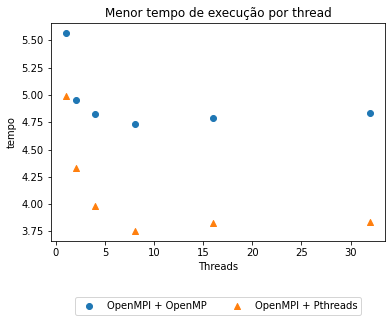

In [209]:
plt.close()

plt.scatter(melhor_threads['tempo']['mpi_omp'].keys(), melhor_threads['tempo']['mpi_omp'].values(), label='OpenMPI + OpenMP', marker='o')
plt.scatter(melhor_threads['tempo']['mpi_pth'].keys(), melhor_threads['tempo']['mpi_pth'].values(), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("tempo")
plt.xlabel("Threads")
plt.title("Menor tempo de execução por thread")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

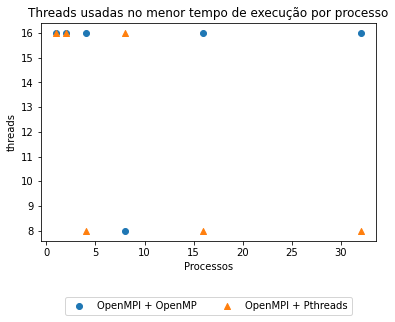

In [210]:
plt.close()

plt.scatter(melhor_threads['processos']['mpi_omp'].keys(), melhor_threads['processos']['mpi_omp'].values(), label='OpenMPI + OpenMP', marker='o')
plt.scatter(melhor_threads['processos']['mpi_pth'].keys(), melhor_threads['processos']['mpi_pth'].values(), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("threads")
plt.xlabel("Processos")
plt.title("Threads usadas no menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

#### Melhor (processo e thread)

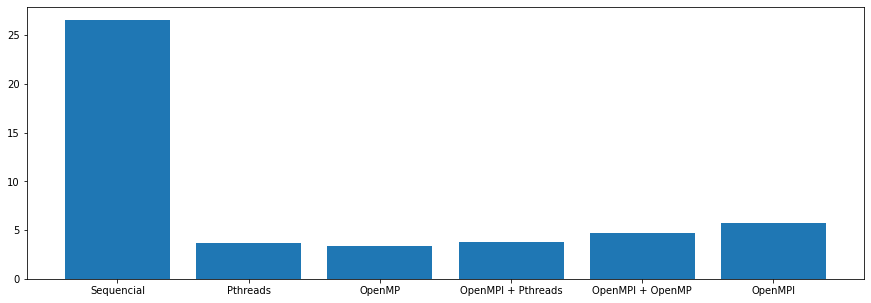

                    Menor tempo
Sequencial              26.5673
Pthreads                 3.7094
OpenMP                   3.4120
OpenMPI + Pthreads       3.7568
OpenMPI + OpenMP         4.7308
OpenMPI                  5.7586


In [211]:
melhor = {
    'Sequencial' : 1000, # infinito arbitrario
    'Pthreads' : 1000,
    'OpenMP' : 1000,
    'OpenMPI + Pthreads' : 1000,
    'OpenMPI + OpenMP' : 1000,
    'OpenMPI' : 1000
}

melhor['Sequencial'] = min(data['seq'][1])

for t in threads:
  tmp = min(data['pth'][t])
  if (tmp < melhor['Pthreads']):
    melhor['Pthreads'] = tmp

for t in threads:
  tmp = min(data['omp'][t])
  if (tmp < melhor['OpenMP']):
    melhor['OpenMP'] = tmp

for p in processos:
  for t in threads:
    tmp = min(data['mpi_pth'][p][t])
    if (tmp < melhor['OpenMPI + Pthreads']):
      melhor['OpenMPI + Pthreads'] = tmp
      
for p in processos:
  for t in threads:
    tmp = min(data['mpi_omp'][p][t])
    if (tmp < melhor['OpenMPI + OpenMP']):
      melhor['OpenMPI + OpenMP'] = tmp

for p in processos:
  #for t in threads:
  tmp = min(data['mpi'][p])
  if (tmp < melhor['OpenMPI']):
    melhor['OpenMPI'] = tmp

plt.figure(figsize=(15,5))
plt.bar(melhor.keys(), melhor.values())
plt.show()

print(pd.DataFrame.from_dict(melhor, orient='index', columns=['Menor tempo']))

## Análise de resultados

A partir dos gráficos gerados, podemos observar que o desempenho dos programas implementados torna-se constante a partir de certo momento, com exceção do caso sequencial. Entre todos os testes realizados, o gráfico acima aponta que o menor tempo adquirido foi gerado pelo programa com OpenMP puro, contudo, isso só acontece com 32 threads. Comparativamente, os resutados encontrados para as implementações com MPI chegam a médias próximas muito mais rápido.

O desempenho dos programas com OpenMPI apresentam a melhor implementação como a de MPI + Pthreads. É também possível observar pelos gráficos acima (principalmente, pelo gráfico que indica 'Threads usadas no menor tempo de execução por processo') que o programa MPI+OpenMP exige mais threads por processo do que a implementação MPI+Pthreads na maioria dos casos.

Tendo em vista esses fatores, pode-se concluir que o programa de melhor desempenho é o da combinação de MPI+Pthreads.